Cholinergic neuromodulation of prefrontal attractor dynamics controls performance in spatial WM
===============================================================================================



## Notebook Settings



In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

%run ~/models/NeuroTorch/notebooks/setup.py
%matplotlib inline
%config InlineBackend.figure_format = 'png'

REPO_ROOT = "/home/leon/models/NeuroTorch"
pal = sns.color_palette("tab10")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python exe
/home/leon/mambaforge/envs/dual_data/bin/python

## Imports



In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd
from time import perf_counter 
from scipy.stats import circmean

from src.utils import *

In [1]:
df = raw_data_to_df(THRESH=30)

/home/leon/nb_stim_data/org/../src/utils.py:829: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.48528137423857' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["class"] == i_class + 1, "SecondStiX"] = second_X[i_class]
/home/leon/nb_stim_data/org/../src/utils.py:830: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.48528137423857' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["class"] == i_class + 1, "SecondStiY"] = second_Y[i_class]

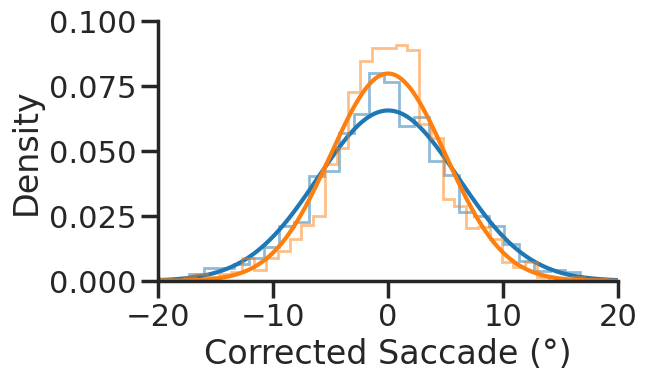

In [1]:
a, b = plot_dtheta(df, "first", "all")

In [1]:
import scipy.stats as stats
mu_, sigma_ = stats.norm.fit(a)
mu_, sigma_on = stats.norm.fit(b)
print(sigma_, sigma_on)
print(sigma_**2, sigma_on**2)

stat, p_value = stats.levene(a, b)
print(stat, p_value)

6.086302990994031 5.002583976354366
37.04308409818288 25.02584644047746
44.75237088744802 2.678809460438713e-11

In [1]:
from src.stats.bootstrap import my_boots_ci

In [1]:
def get_std(x):
    _, sigma = stats.norm.fit(x)
    return sigma

In [1]:
ci_off = my_boots_ci(a, get_std, n_samples=10000, method="BCa", alpha=0.05)
print(ci_off)
print((ci_off[1] - ci_off[0])/2)

ci_on = my_boots_ci(b, get_std, n_samples=10000, method="BCa", alpha=0.05)
print((ci_on[1] - ci_on[0])/2)

[5.843350506736987, 6.377256851073366]
0.2669531721681895
0.2279140774084767

In [1]:
model = glm_NB_task_monkey(df, error="dtheta2", THRESH=30)

#+begin_example
  dtheta2 ~ NB * task * monkey
                   Generalized Linear Model Regression Results                  
  Dep. Variable:                dtheta2   No. Observations:                 4289
  Model:                            GLM   Df Residuals:                     4281
  Model Family:                Gaussian   Df Model:                            7
  Link Function:               Identity   Scale:                          4191.7
  Method:                          IRLS   Log-Likelihood:                -23969.
  Date:                Mon, 15 Jan 2024   Deviance:                   1.7945e+07
  Time:                        17:20:29   Pearson chi2:                 1.79e+07
  No. Iterations:                     3   Pseudo R-squ. (CS):            0.05377
  Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
  --------------------------------------------------------

In [1]:
model.pvalues

Intercept         1.111958e-30
NB                4.480159e-04
task              1.738159e-06
NB:task           1.417999e-02
monkey            7.129972e-04
NB:monkey         4.251354e-02
task:monkey       4.609310e-01
NB:task:monkey    8.055344e-01
dtype: float64

In [1]:
glm_NB_distance_monkey(df, 0, error="dtheta2", THRESH=30)

#+begin_example
  dtheta2 ~ NB * C(distance) * monkey
                   Generalized Linear Model Regression Results                  
  Dep. Variable:                dtheta2   No. Observations:                 1697
  Model:                            GLM   Df Residuals:                     1685
  Model Family:                Gaussian   Df Model:                           11
  Link Function:               Identity   Scale:                          3179.3
  Method:                          IRLS   Log-Likelihood:                -9244.6
  Date:                Mon, 15 Jan 2024   Deviance:                   5.3572e+06
  Time:                        17:07:23   Pearson chi2:                 5.36e+06
  No. Iterations:                     3   Pseudo R-squ. (CS):            0.04278
  Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
  ---------------------------------